# ANÁLISIS DE LA PRIMERA EVALUACIÓN
## IES Puerto de la Cruz - Telesforo Bravo | Curso 2017-2018

In [56]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML

In [57]:
df = pd.read_excel("data_2017.xlsx", index_col=0, sheet_name="EVAL1")
df.head()

,etapa,éxito,absentismo,partes,suspensión_asistencia,ratio
grupo,,,,,,
ESO1A,ESO,32.0,8.66,2.0,NaN,25
ESO1B,ESO,43.5,6.13,NaN,NaN,22
ESO1C,ESO,44.0,4.82,3.0,NaN,25
ESO1D,ESO,46.2,2.94,3.0,NaN,27
ESO2A,ESO,24.1,5.95,10.0,3.0,29


In [88]:
def get_data_by_stages(stages):
    if not isinstance(stages, list):
        stages = [stages]
    return df[df["etapa"].isin(stages)]

In [137]:
def barchart(serie, value_margin=3, is_percentage=True):
    FONTSIZE = 20
    if is_percentage:
        percentage_symbol = "%"
    else:
        percentage_symbol = ""
    serie = serie.sort_values()
    plt.figure(figsize=(30, 10), dpi=96)
    sns.barplot(serie.index, serie)
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=FONTSIZE)
    ax = plt.gca()
    # show rate percentage on bars
    for i, value in enumerate(serie):
        ax.text(i, value - value_margin,
                f"{value:,.0f}{percentage_symbol}", ha="center", fontsize=FONTSIZE, color="w")
    # hide chart frame
    for spine in ax.spines.values():
        spine.set_visible(False)
    # hide ticks
    plt.tick_params(top="off", bottom="off", left="off",
                    right="off", labelleft="off", labelbottom="on")

# RENDIMIENTO

## ESO + FPB

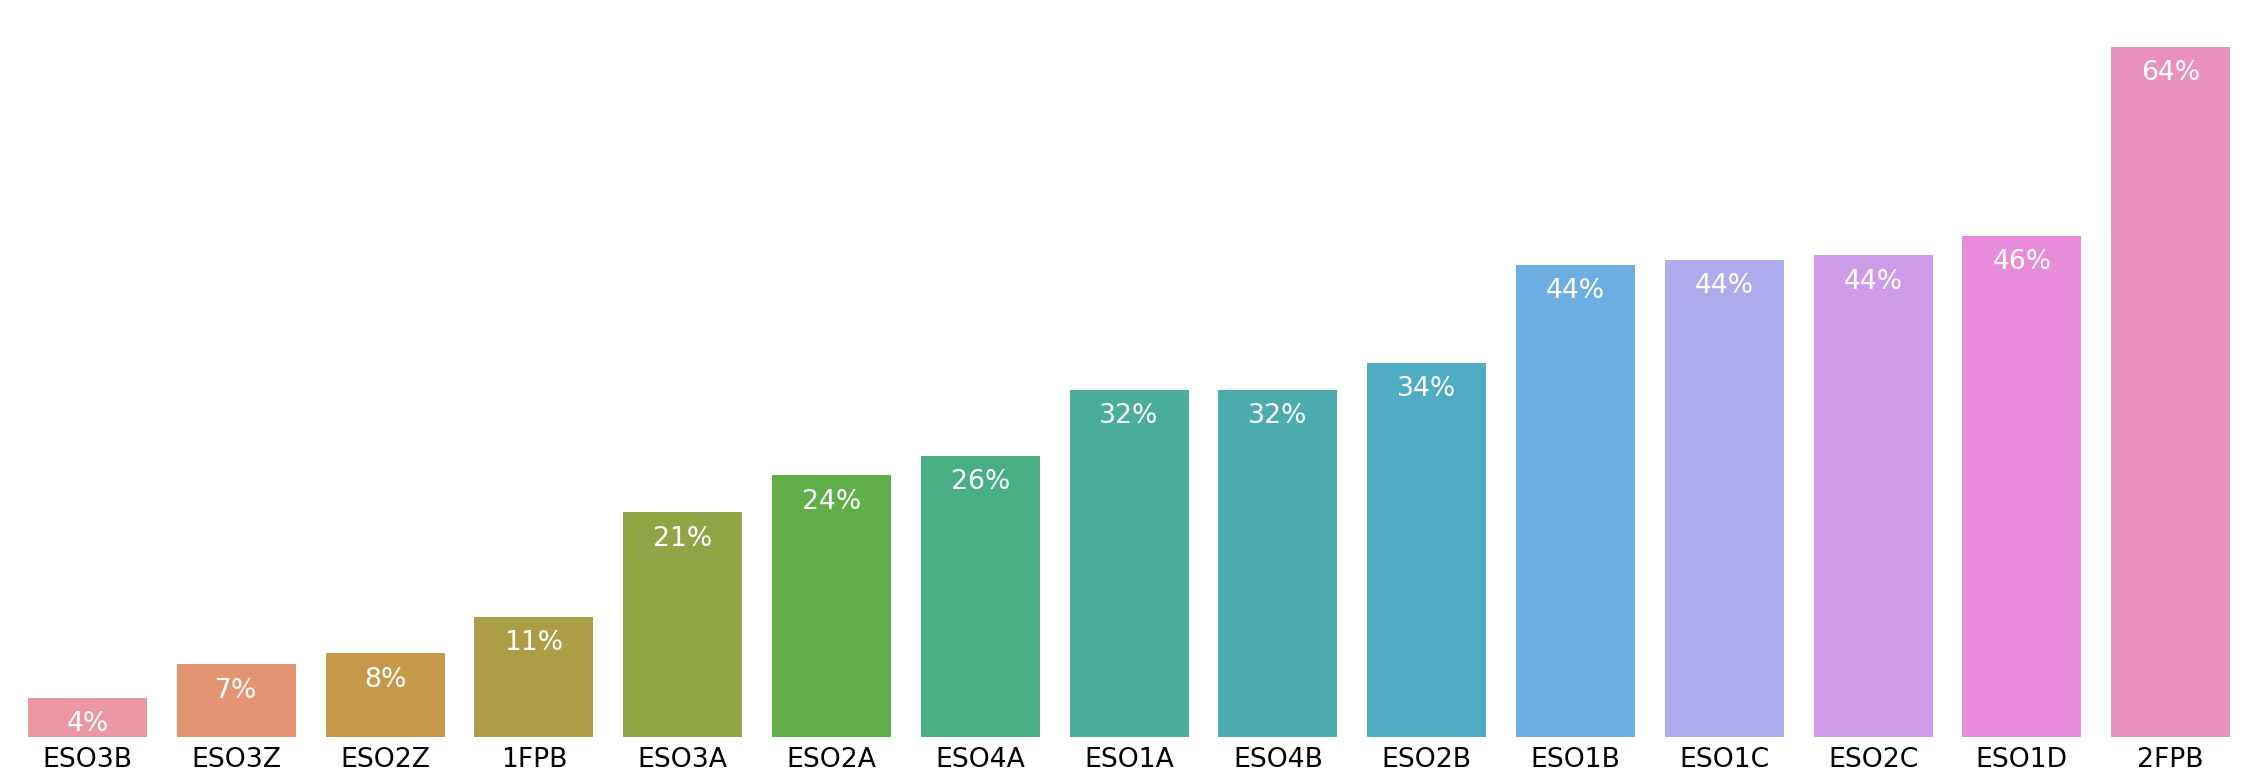

In [138]:
df_ESOFPB = get_data_by_stages(["ESO", "FPB"])
barchart(df_ESOFPB["éxito"])

In [91]:
df_ESOFPB.mean()

éxito                     29.333333
absentismo                 9.776000
partes                     7.363636
suspensión_asistencia      4.000000
ratio                     22.400000
rate                     658.906667
dtype: float64

## BACHILLERATO

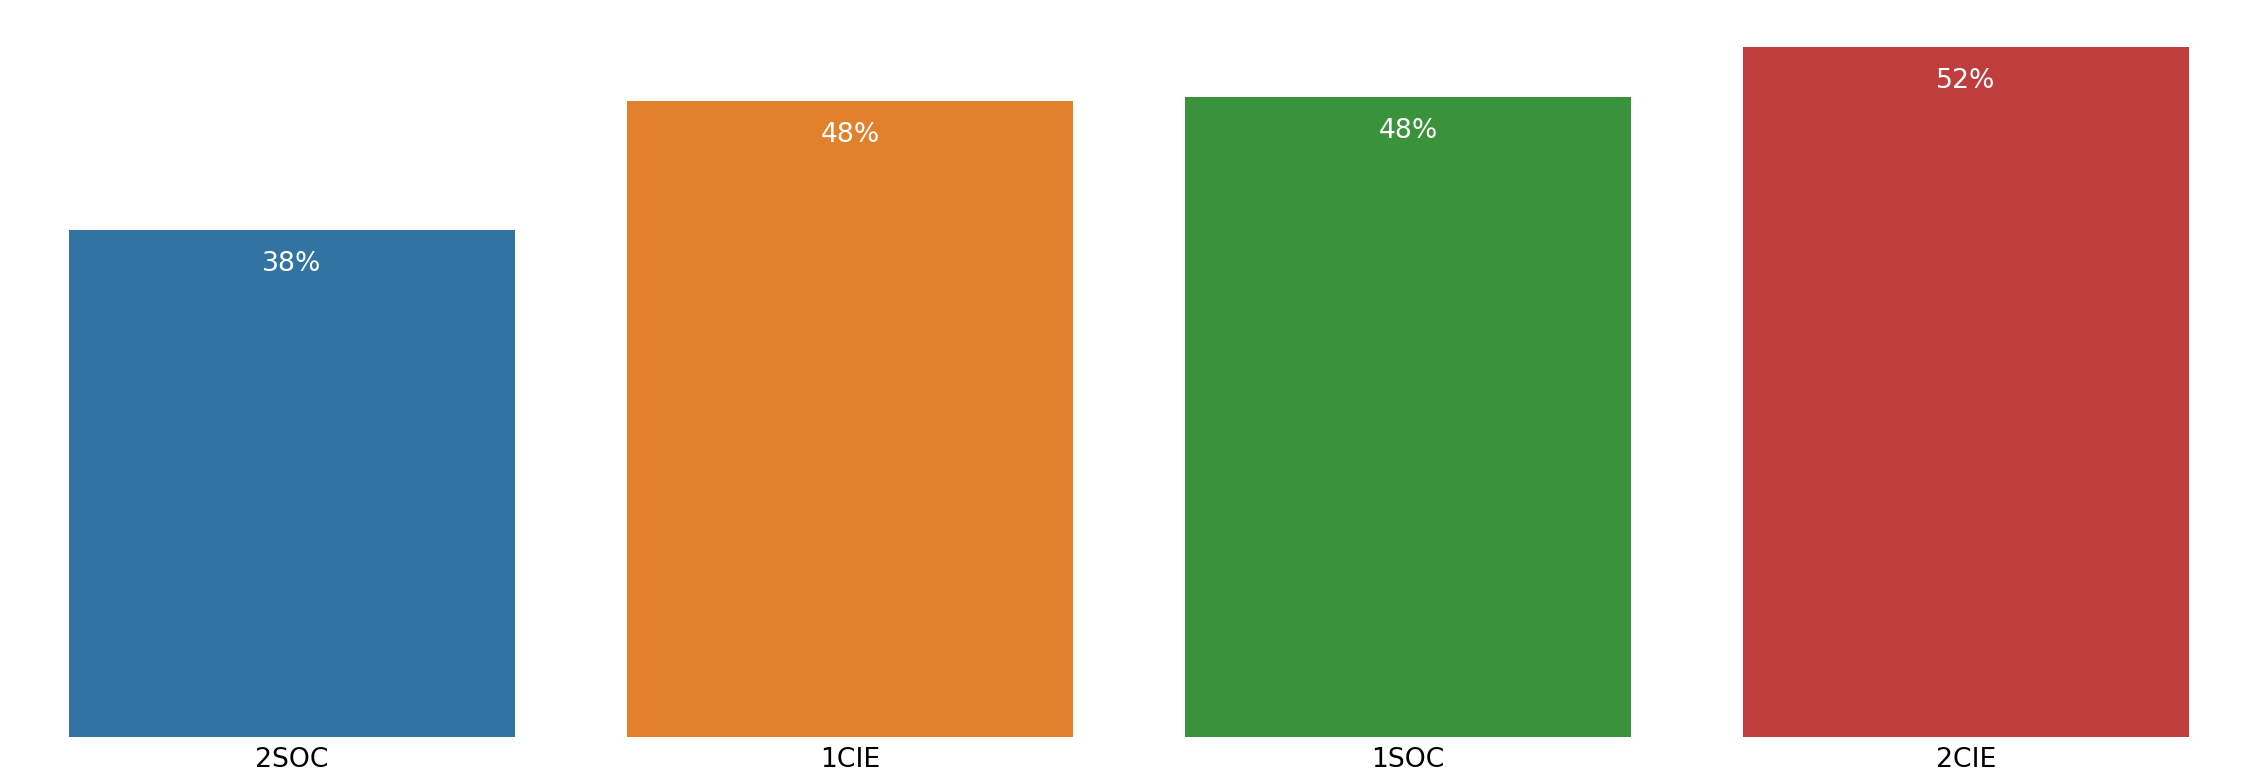

In [105]:
df_BACH = get_data_by_stages("BACH")
barchart(df_BACH["éxito"])

In [106]:
df_BACH.mean()

éxito                      46.4750
absentismo                  4.5025
partes                      1.0000
suspensión_asistencia          NaN
ratio                      24.2500
rate                     1137.8500
dtype: float64

## CICLOS FORMATIVOS DE GRADO MEDIO

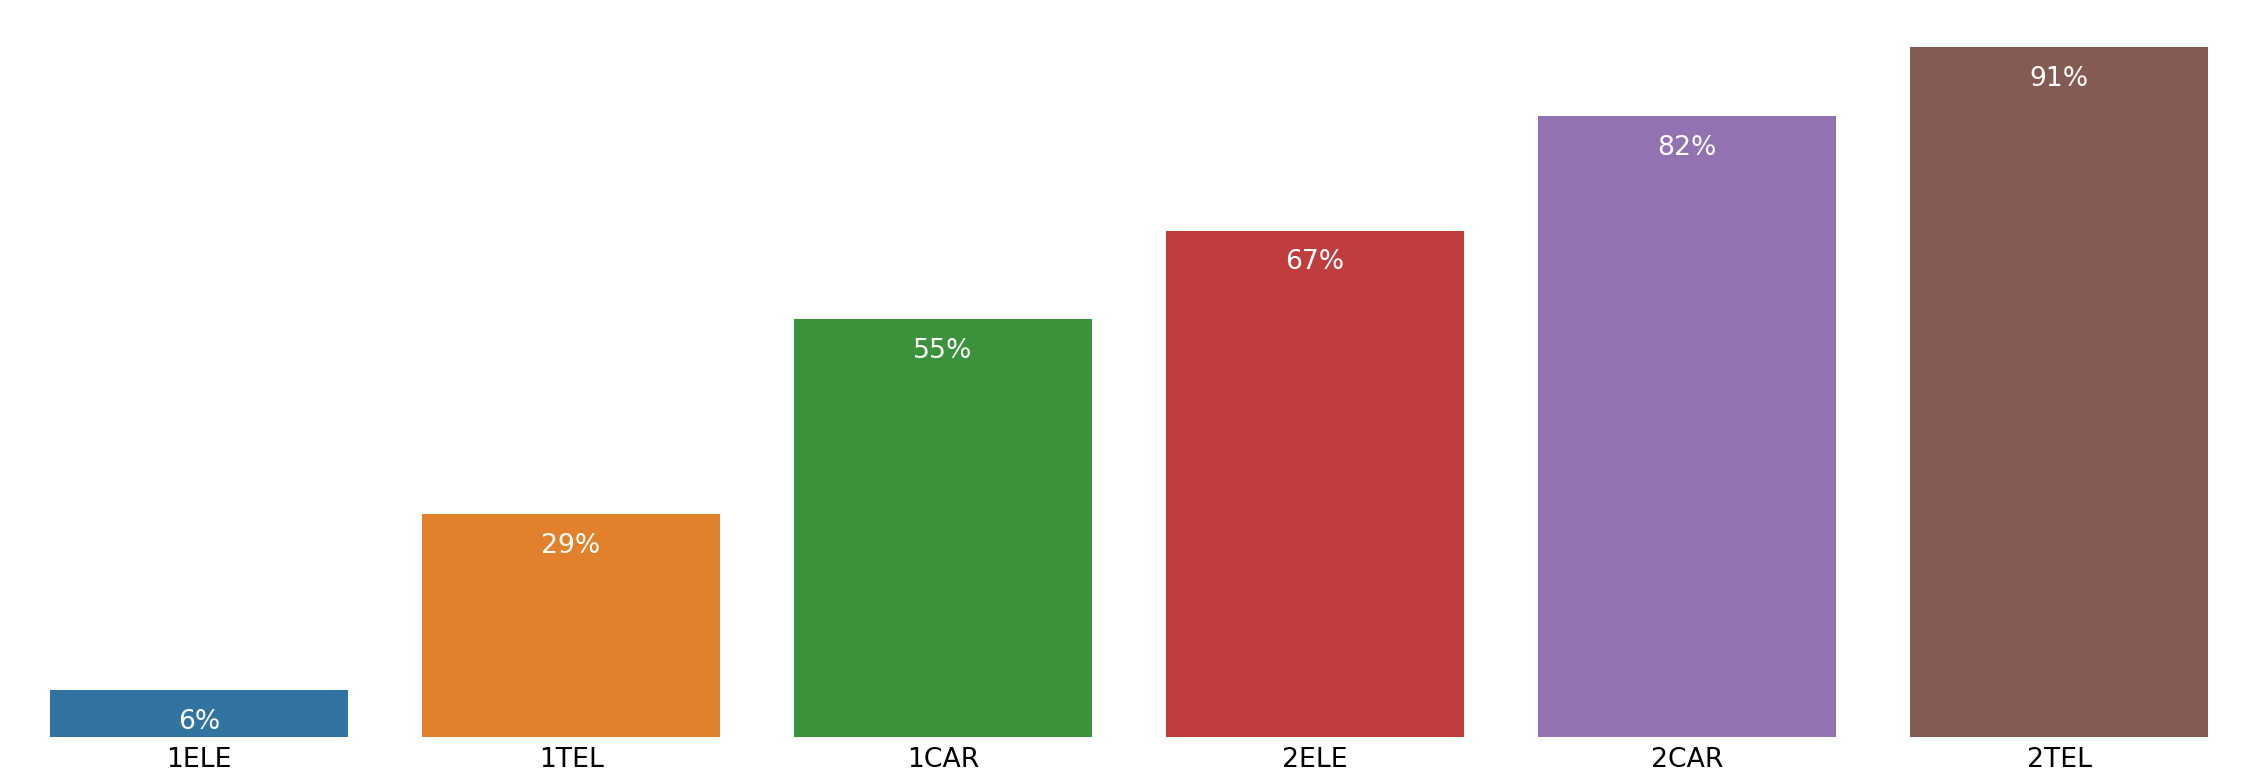

In [121]:
df_CFGM = get_data_by_stages("CFGM")
barchart(df_CFGM["éxito"], 5)

In [95]:
df_CFGM.mean()

éxito                     55.000000
absentismo                14.743333
partes                     1.500000
suspensión_asistencia      1.000000
ratio                     13.666667
rate                     697.766667
dtype: float64

## CICLOS FORMATIVOS DE GRADO SUPERIOR

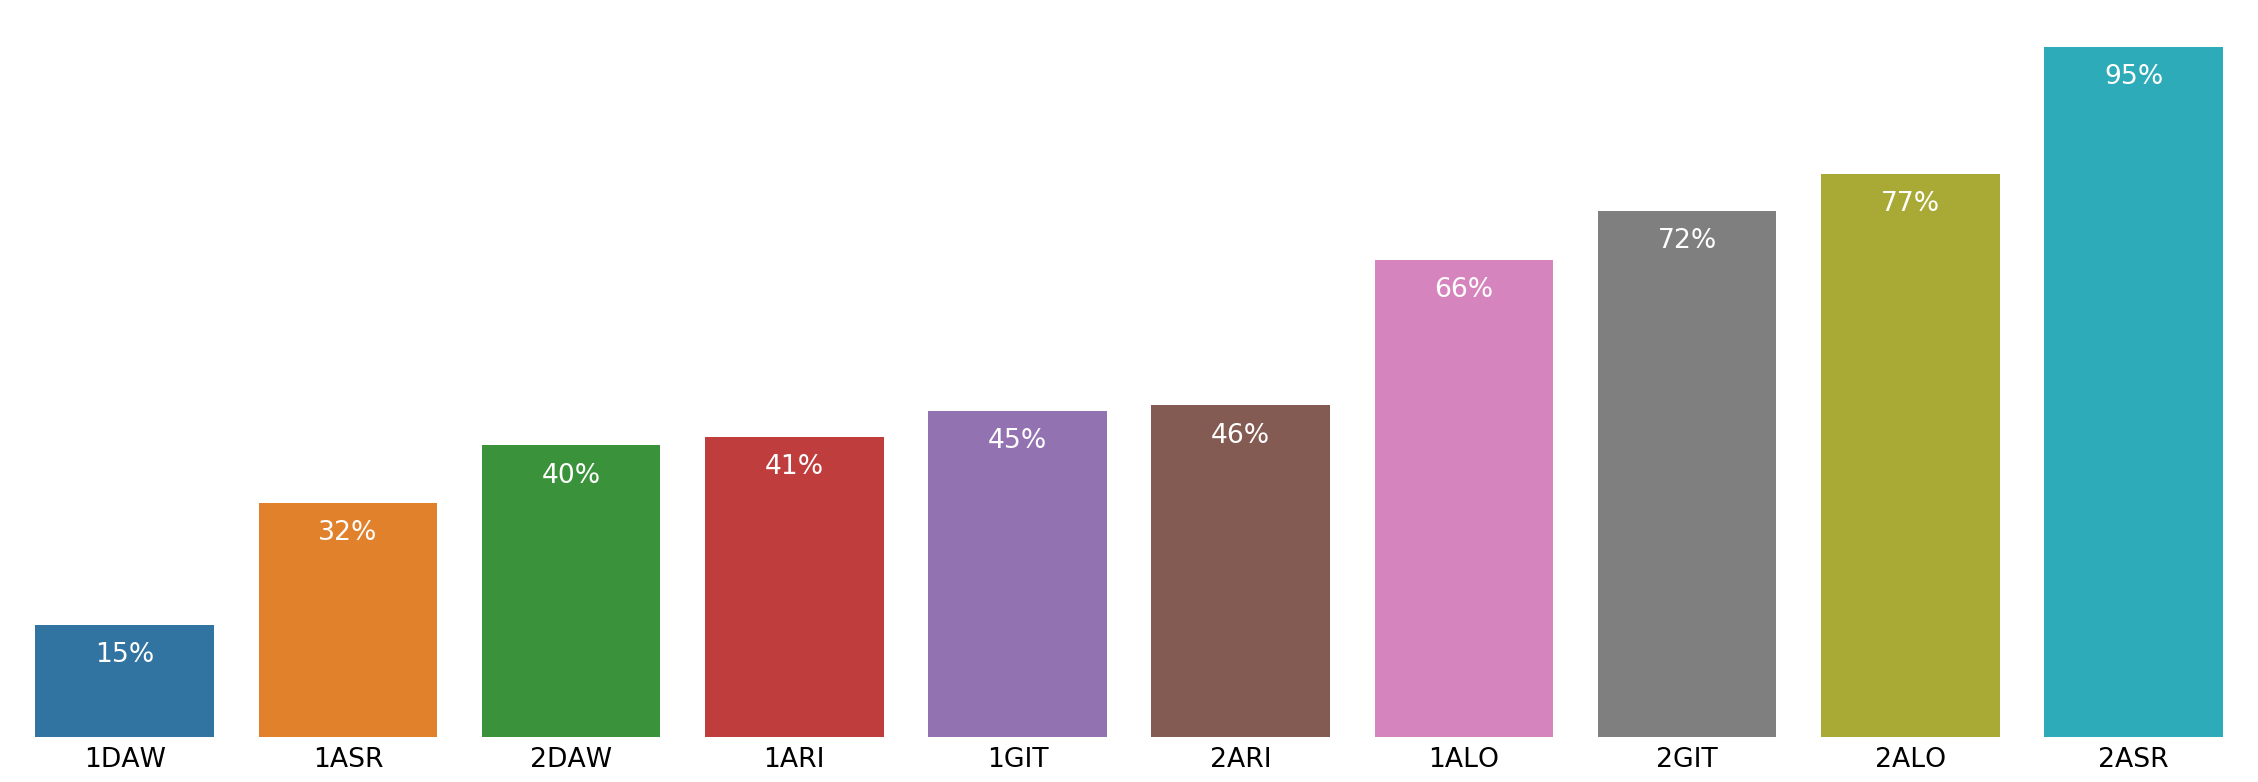

In [122]:
df_CFGS = get_data_by_stages("CFGS")
barchart(df_CFGS["éxito"], 5)

In [97]:
df_CFGS.mean()

éxito                      52.870
absentismo                 12.903
partes                      1.000
suspensión_asistencia       1.000
ratio                      21.600
rate                     1126.910
dtype: float64

## GLOBAL

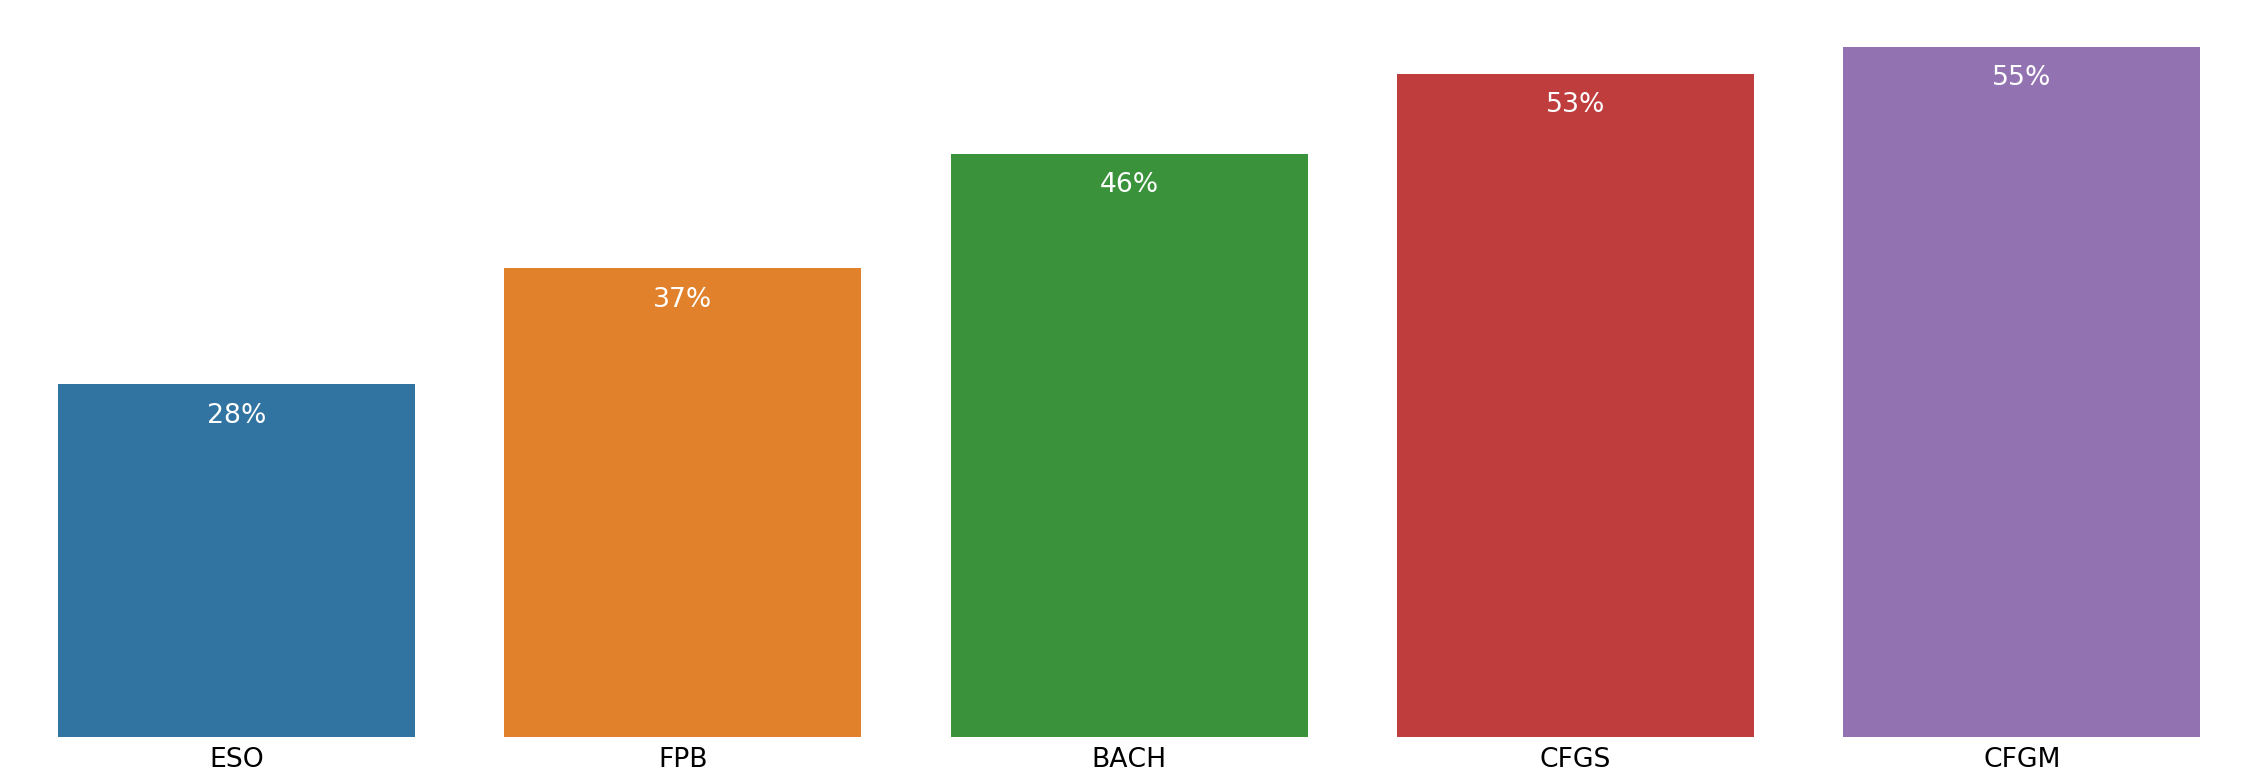

In [109]:
df_summary = df.groupby("etapa").mean()
barchart(df_summary["éxito"])

In [100]:
mean_success = df["éxito"].mean()
display(HTML(f"<h3>Rendimiento global medio: {mean_success:.2f}%</h3>"))

# ABSENTISMO

## ESO + FPB

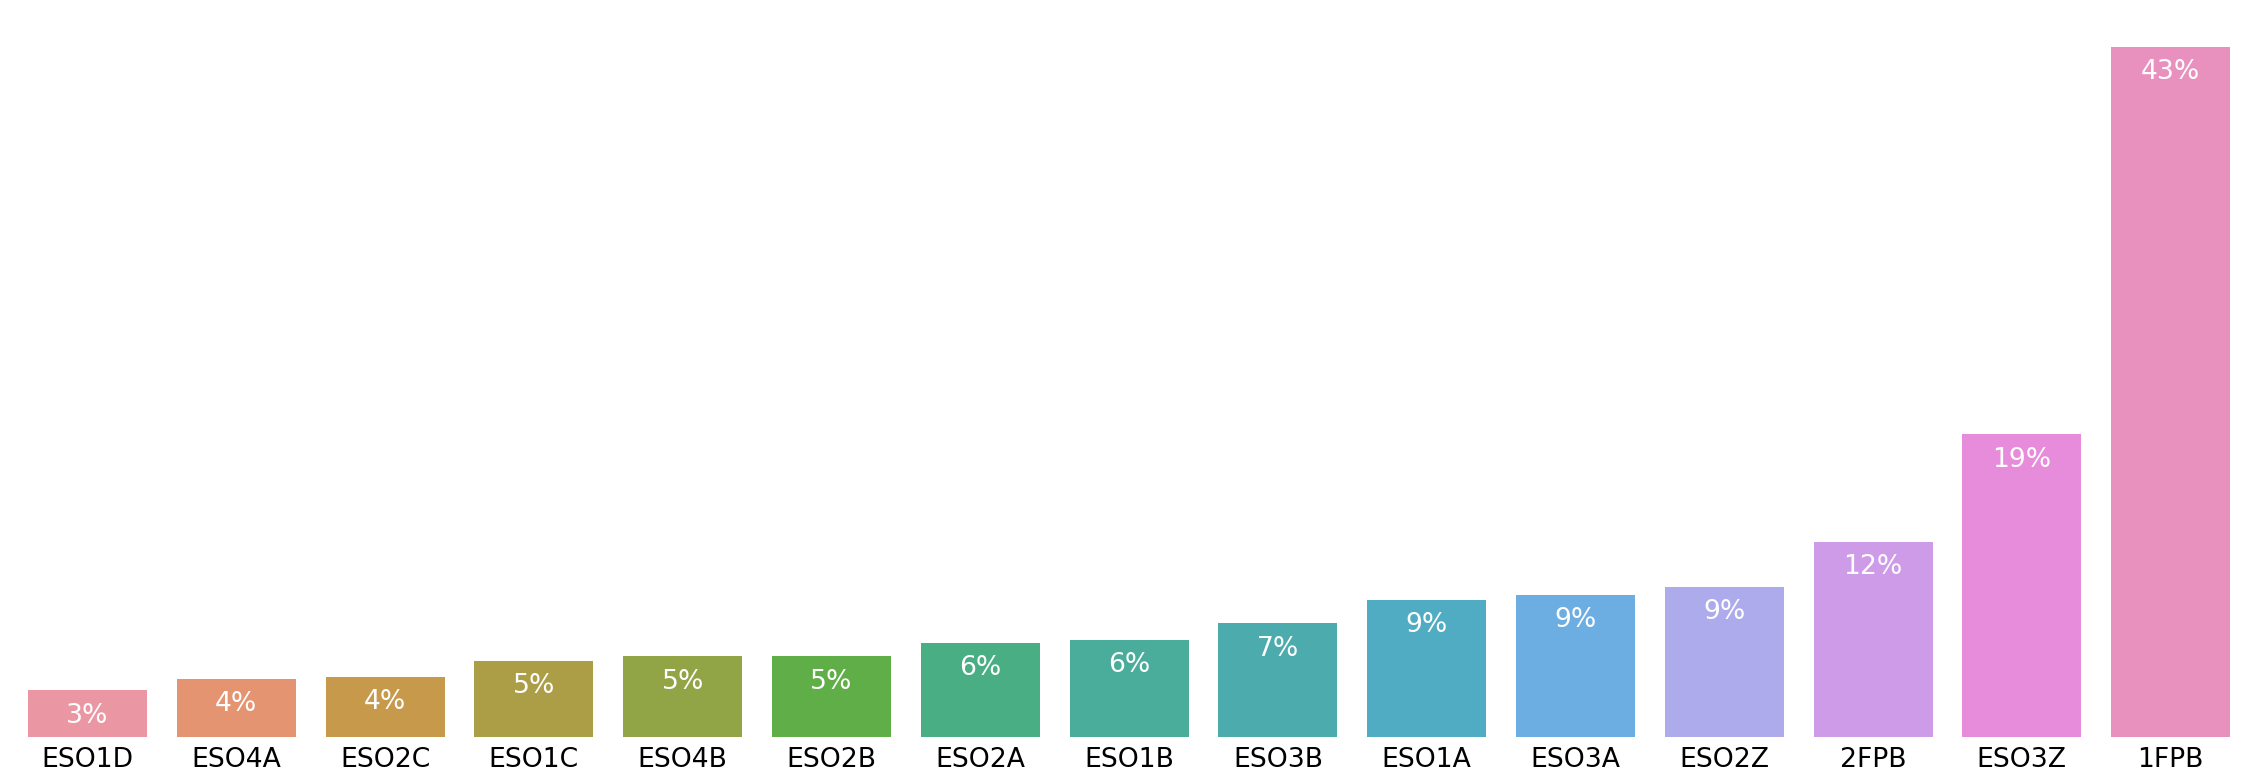

In [123]:
barchart(df_ESOFPB["absentismo"], 2)

## BACHILLERATO

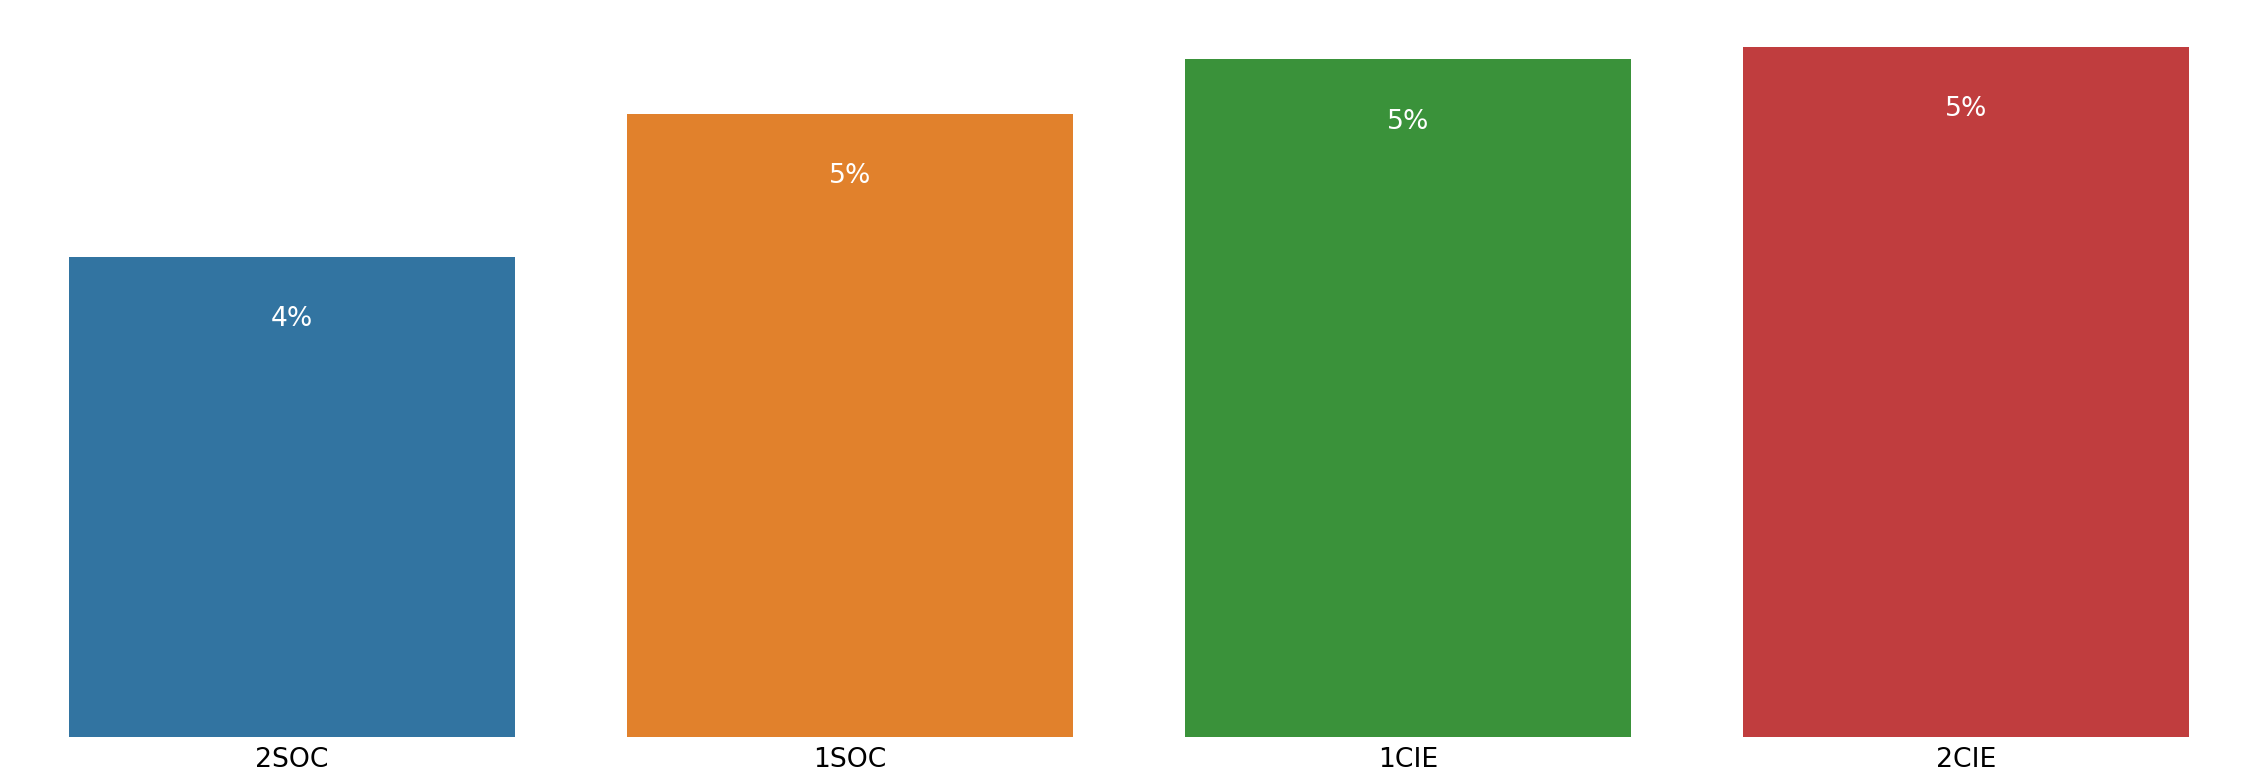

In [124]:
barchart(df_BACH["absentismo"], 0.5)

## CICLOS FORMATIVOS DE GRADO MEDIO

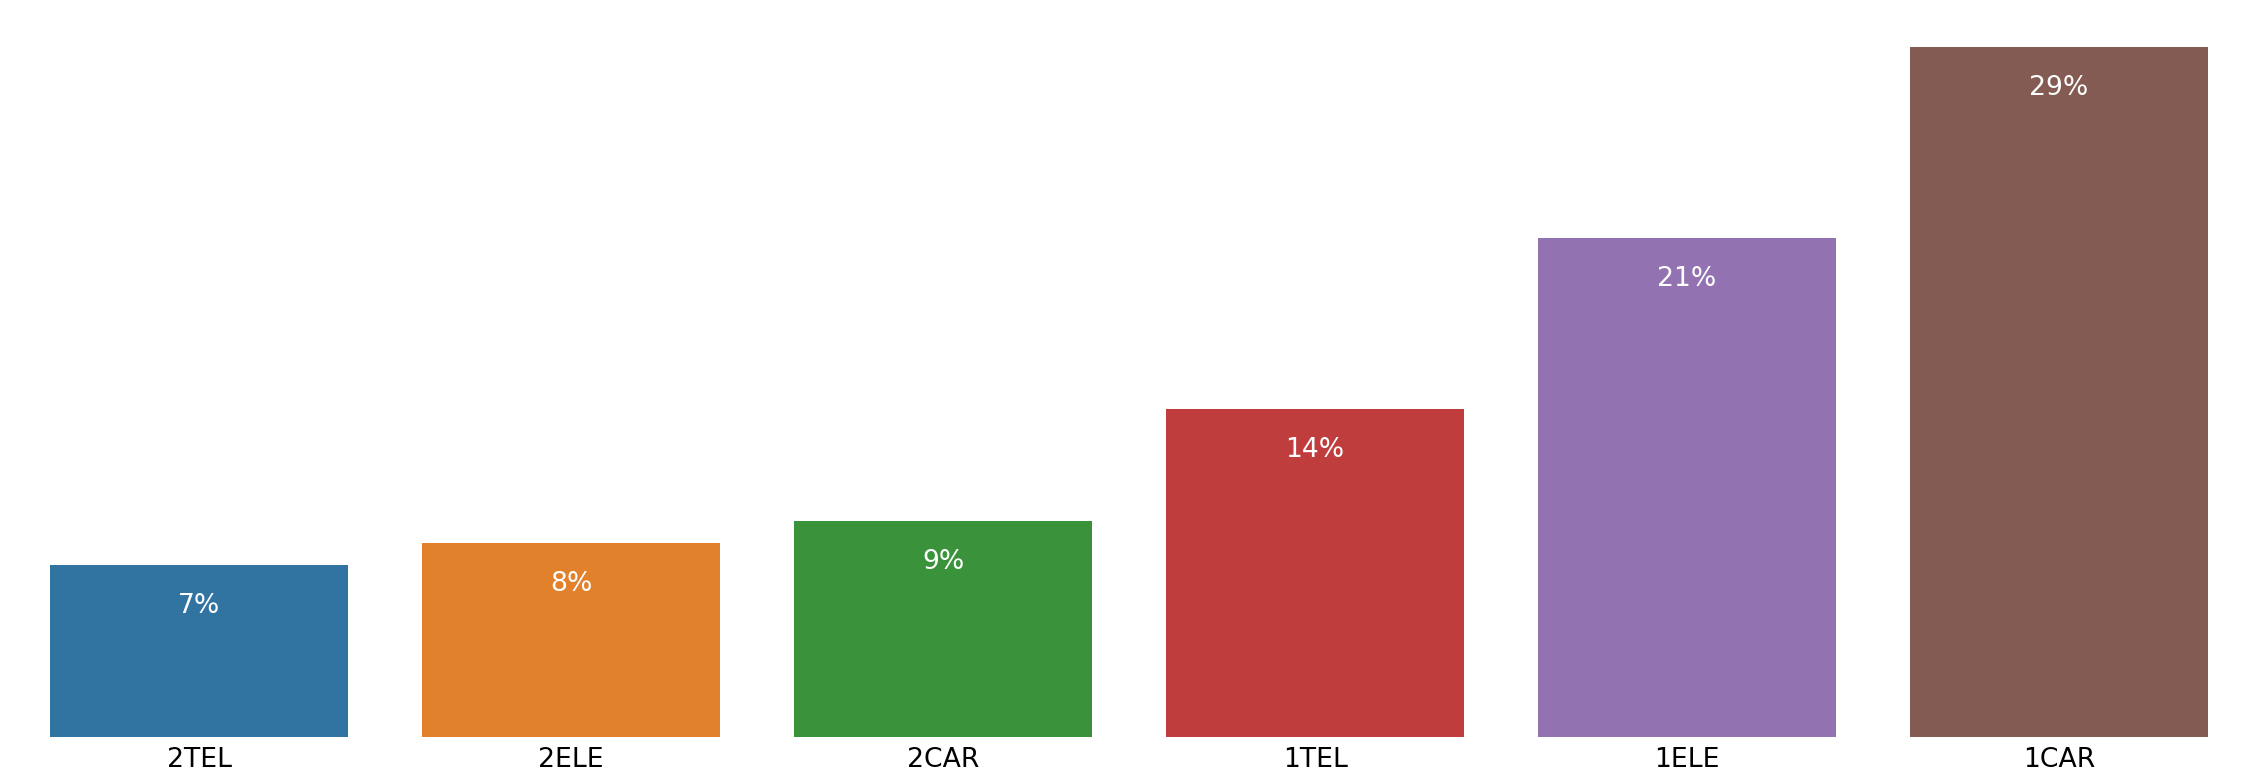

In [125]:
barchart(df_CFGM["absentismo"], 2)

## CICLOS FORMATIVOS DE GRADO SUPERIOR

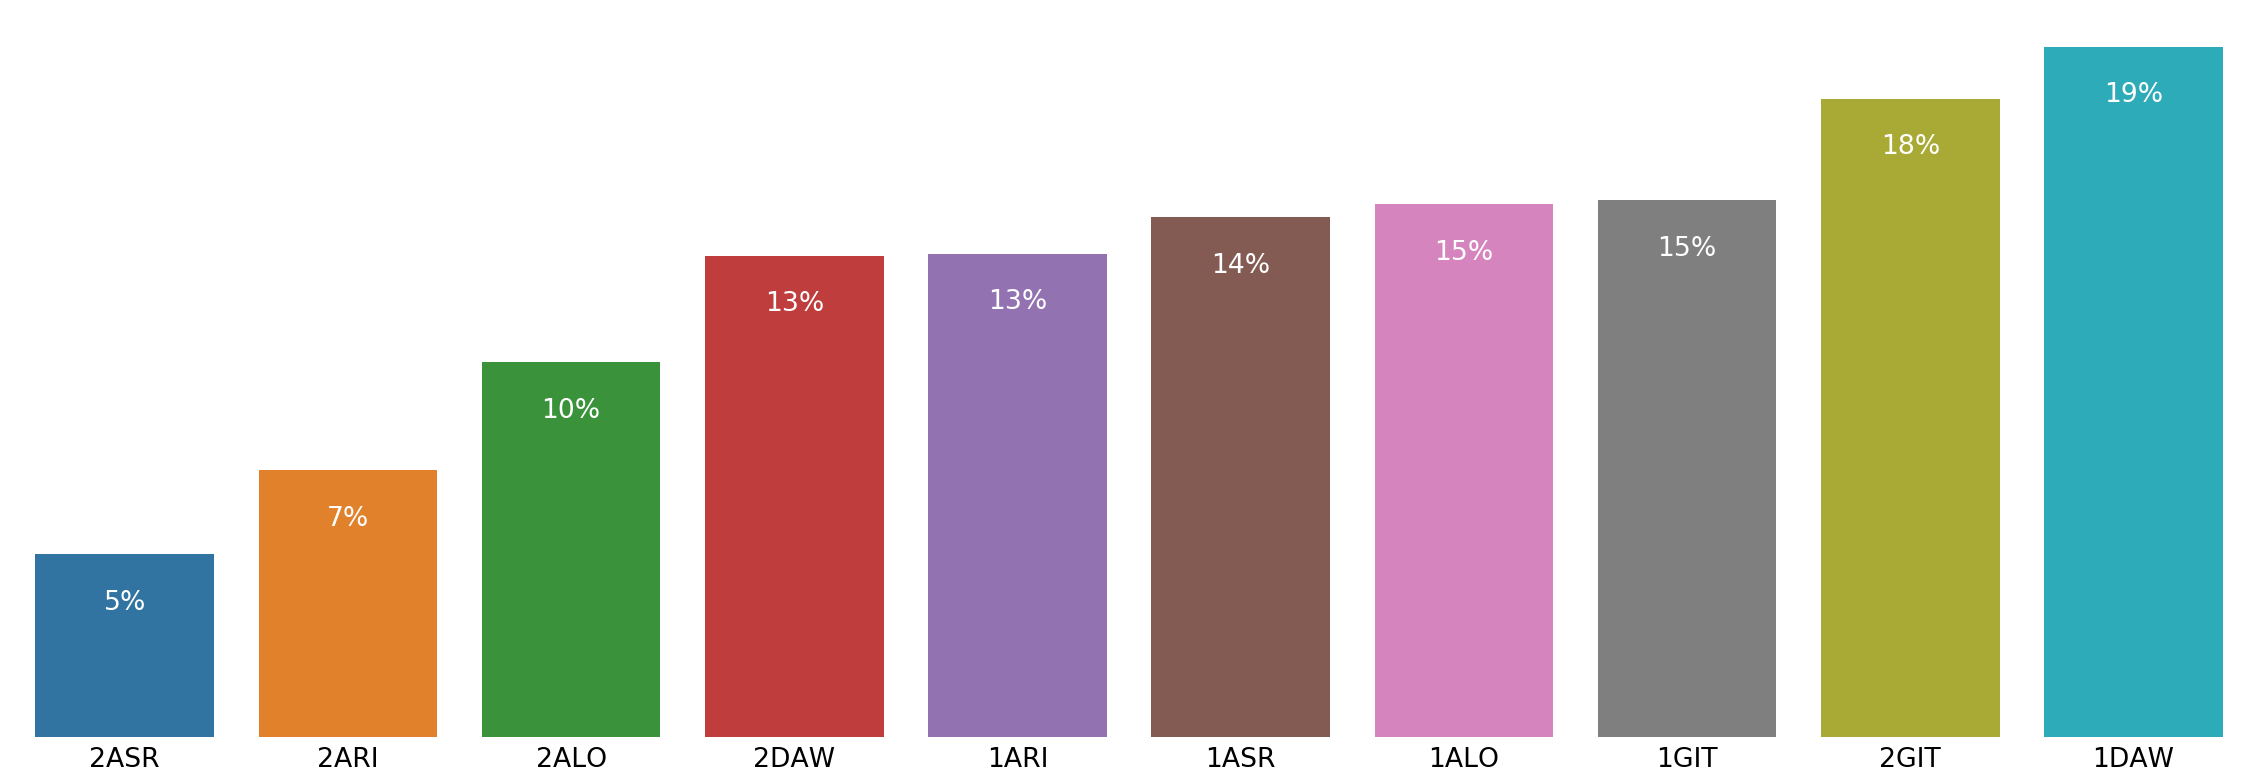

In [128]:
barchart(df_CFGS["absentismo"], 1.5)

## GLOBAL

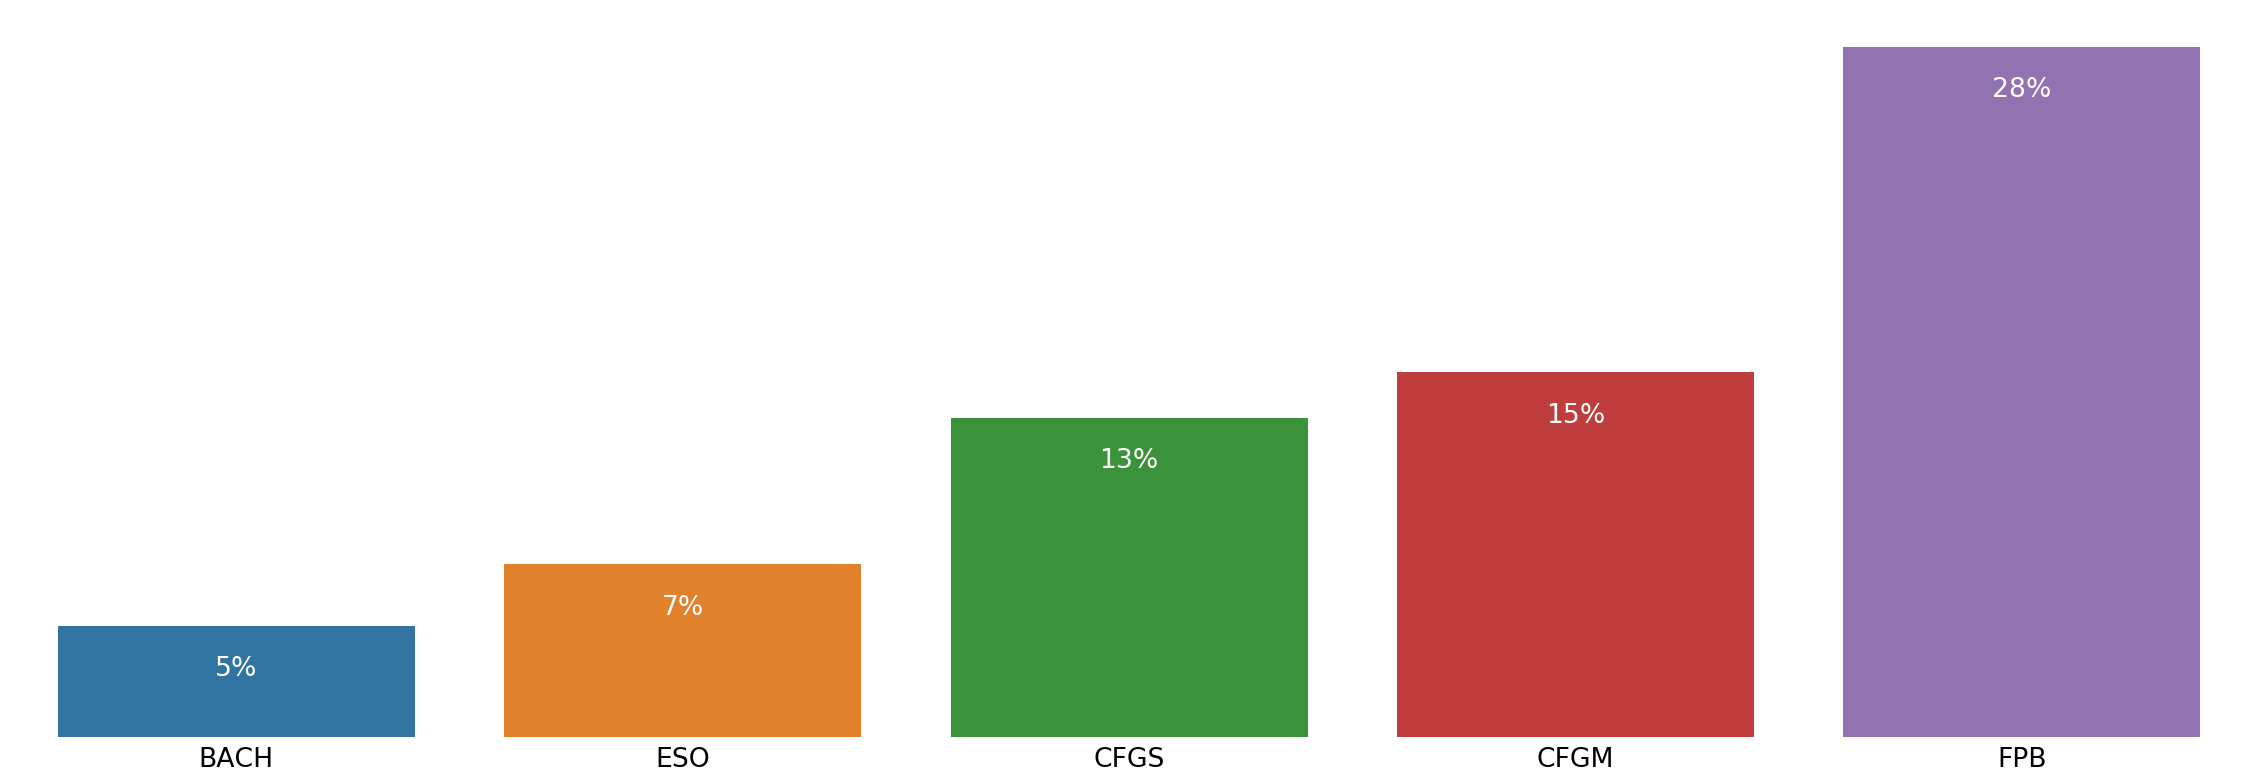

In [130]:
barchart(df_summary["absentismo"], 2)

In [131]:
mean_absence = df["absentismo"].mean()
display(HTML(f"<h3>Absentismo global medio: {mean_absence:.2f}%</h3>"))

# GESTIÓN DE LA CONVIVENCIA

## PARTES DE GESTIÓN

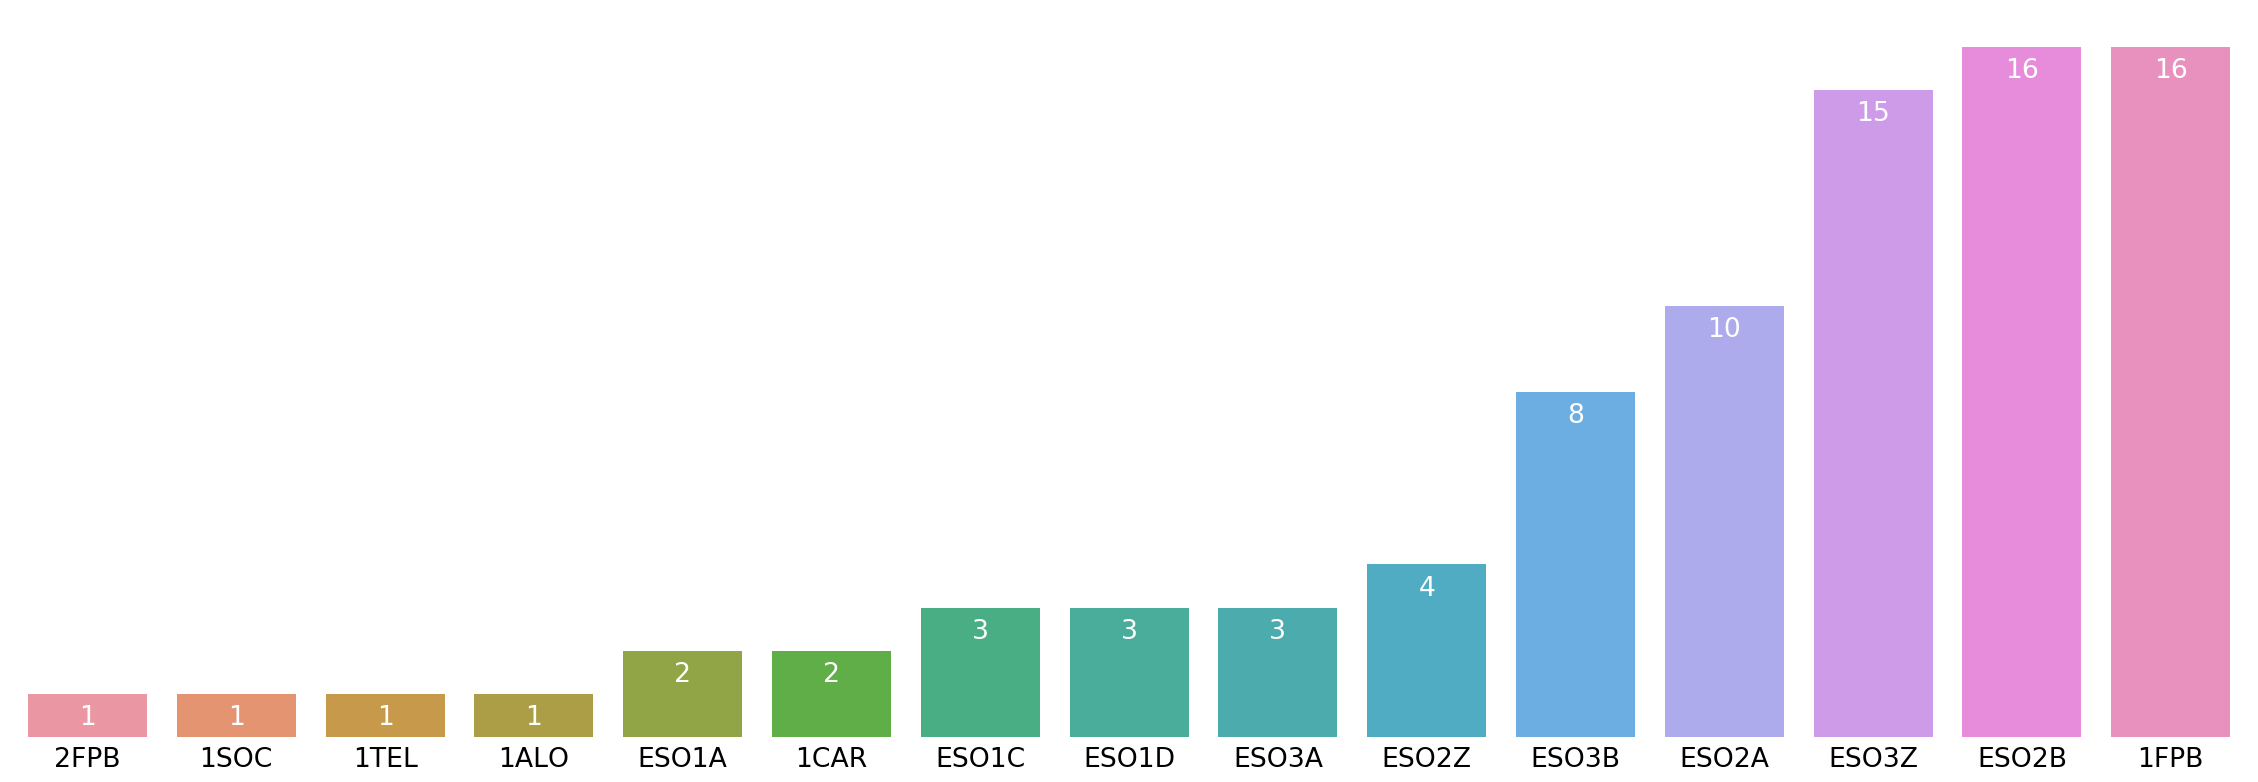

In [143]:
df_reports = df["partes"].dropna()
barchart(df_reports, 0.7, False)

In [145]:
df_reports.sum()

86.0

## SUSPENSIÓN DEL DERECHO DE ASISTENCIA

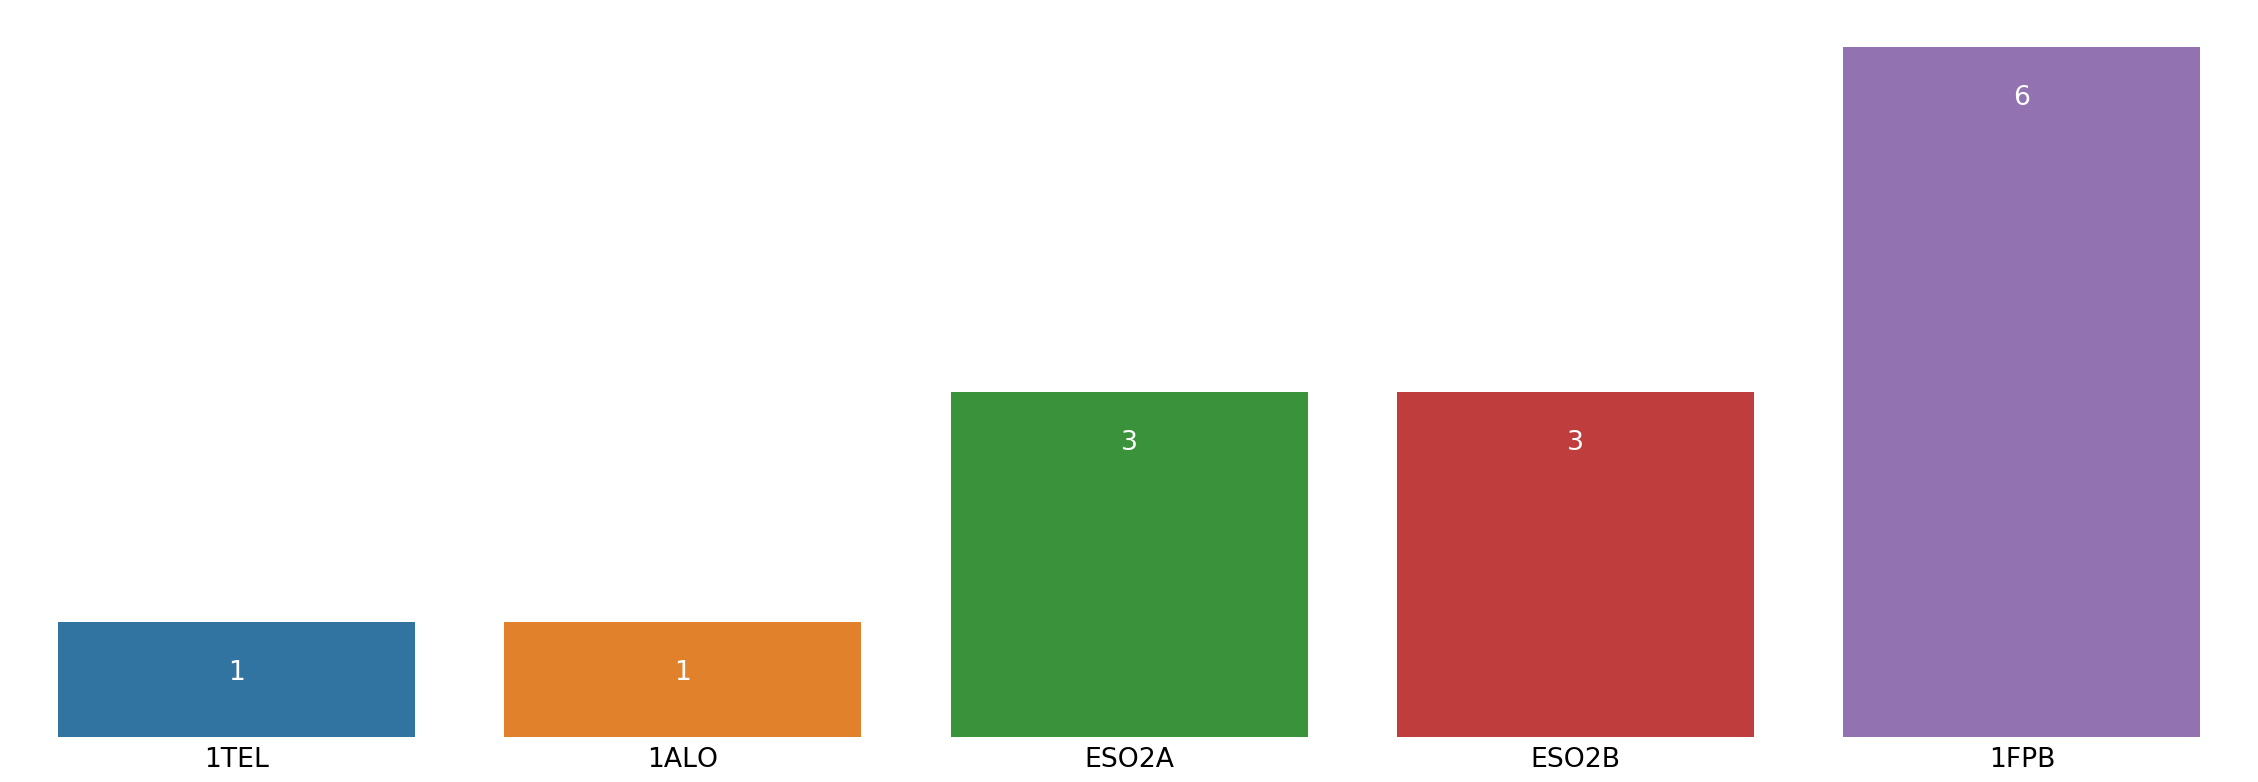

In [146]:
df_non_attendance = df["suspensión_asistencia"].dropna()
barchart(df_non_attendance, 0.5, False)

In [147]:
df_non_attendance.sum()

14.0

# RELACIÓN `ratio-éxito`

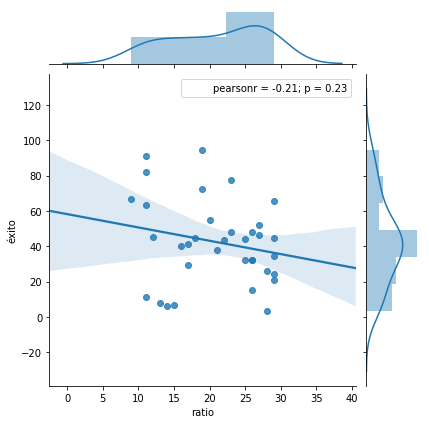

In [164]:
sns.jointplot("ratio", "éxito", df, kind="reg");

## Detección de *outliers*

### Baja ratio y bajo éxito

In [193]:
df[(df["ratio"] < 20) & (df["éxito"] < 20)][["ratio", "éxito"]]

,ratio,éxito
grupo,,
ESO2Z,13,7.7
ESO3Z,15,6.7
1FPB,11,11.1
1ELE,14,6.2


### Alta ratio y alto éxito

In [194]:
df[(df["ratio"] > 25) & (df["éxito"] > 50)][["ratio", "éxito"]]

,ratio,éxito
grupo,,
2CIE,27,51.9
1ALO,29,65.5


# RELACIÓN `absentismo-éxito`

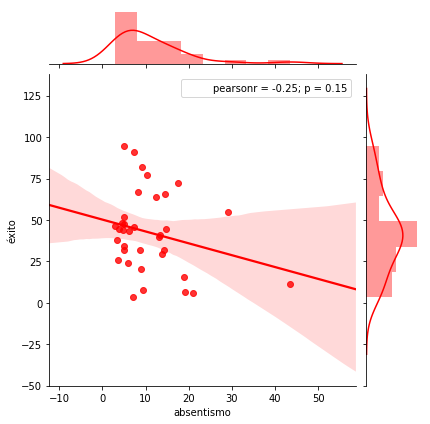

In [161]:
sns.jointplot("absentismo", "éxito", df, kind="reg", color="r");

## Detección de *outliers*

### Bajo absentismo y bajo éxito

In [191]:
df[(df["absentismo"] < 10) & (df["éxito"] < 10)][["absentismo", "éxito"]]

,absentismo,éxito
grupo,,
ESO2Z,9.47,7.7
ESO3B,7.19,3.6


### Alto absentismo y alto éxito

In [192]:
df[(df["absentismo"] > 25) & (df["éxito"] > 50)][["absentismo", "éxito"]]

,absentismo,éxito
grupo,,
1CAR,29.07,55.0


# RELACIÓN `partes-éxito`

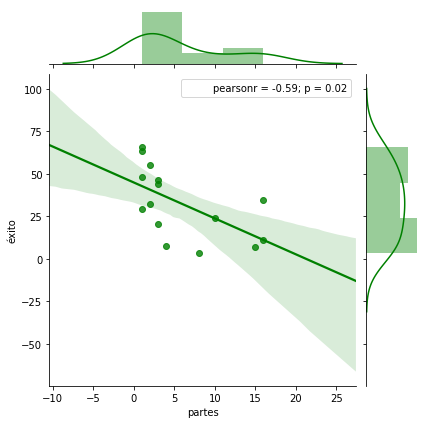

In [195]:
sns.jointplot("partes", "éxito", df, kind="reg", color="g");

## Detección de *outliers*

### Bajo número de partes y bajo éxito

In [210]:
df[(df["partes"] < 10) & (df["éxito"] < 10)][["partes", "éxito"]]

,partes,éxito
grupo,,
ESO2Z,4.0,7.7
ESO3B,8.0,3.6


### Alto número de partes y alto éxito

In [214]:
df[(df["partes"] > 15) & (df["éxito"] > 30)][["partes", "éxito"]]

,partes,éxito
grupo,,
ESO2B,16.0,34.5


# GRUPOS MÁGICOS

> Son aquellos que tienen mejores valores de éxito escolar, menor absentismo y menos partes de gestión.

\begin{equation}
magic = 0.6 · success + 0.2 · e^{-absence} + 0.2 · e^{-reports}
\end{equation}

In [255]:
df2 = df.copy().fillna(0)
df2["magic"] = 0.6 * df2["éxito"] + 0.2 * np.exp(-df2["absentismo"]) + 0.2 * np.exp(-df2["partes"])
magic = df2.sort_values("magic", ascending=False)[["éxito", "absentismo", "partes", "magic"]]

## "Mejores" grupos mágicos

In [256]:
magic.head(5)

,éxito,absentismo,partes,magic
grupo,,,,
2ASR,94.7,5.01,0.0,57.021334
2TEL,90.9,7.26,0.0,54.740141
2CAR,81.8,9.11,0.0,49.280022
2ALO,77.3,10.27,0.0,46.580007
2GIT,72.2,17.50,0.0,43.520000


## "Peores" grupos mágicos

In [257]:
magic.tail(5)

,éxito,absentismo,partes,magic
grupo,,,,
1FPB,11.1,43.49,16.0,6.660000
ESO2Z,7.7,9.47,4.0,4.623679
ESO3Z,6.7,19.07,15.0,4.020000
1ELE,6.2,21.02,0.0,3.920000
ESO3B,3.6,7.19,8.0,2.160218
